## Correcting label images using opening and closing operators

In [1]:
import pyclesperanto_prototype as cle
from skimage.data import cells3d
import matplotlib.pyplot as plt
from skimage.morphology import closing, disk
from skimage.io import imsave

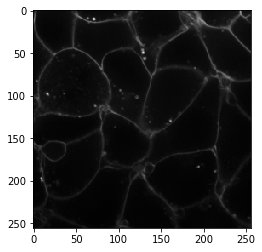

In [2]:
image = cells3d()

membrane2d = cle.push(image[30,0])

cle.imshow(membrane2d)

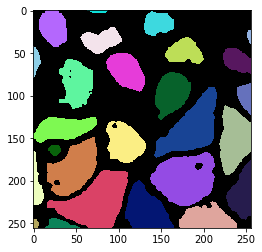

In [3]:
labels = cle.label(cle.gaussian_blur(membrane2d, sigma_x=2, sigma_y=2) < 2000)

cle.imshow(labels, labels=True)

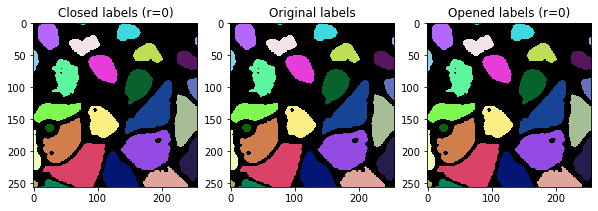

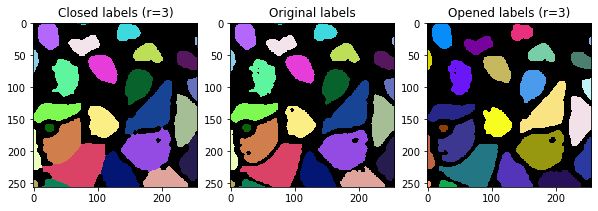

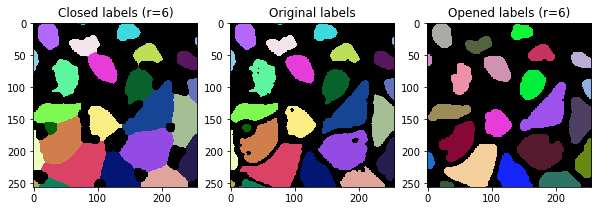

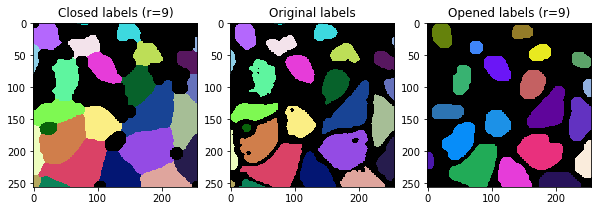

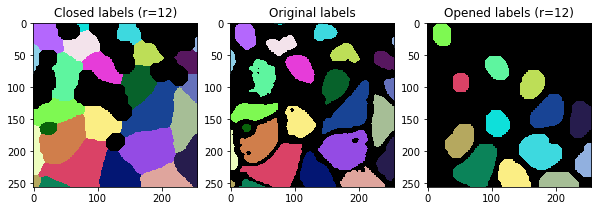

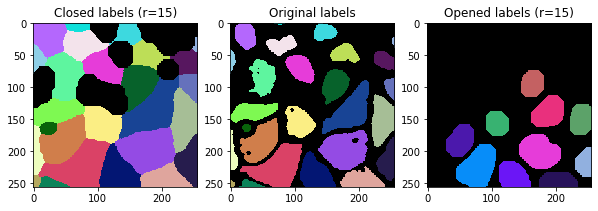

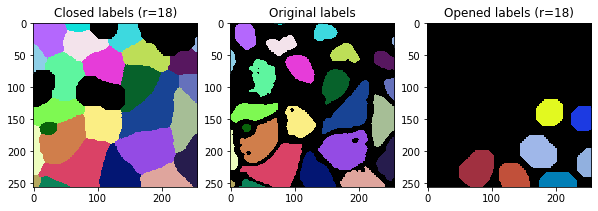

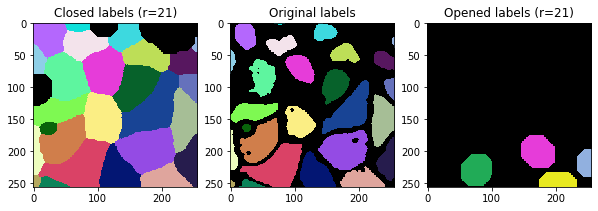

In [4]:
for i, r in enumerate(range(0, 24, 3)):
    
    fix, axs = plt.subplots(1,3, figsize=(10,10))
    
    cle.imshow(cle.closing_labels(labels, radius=r), plot=axs[0], labels=True)
    cle.imshow(labels, plot=axs[1], labels=True)
    cle.imshow(cle.opening_labels(labels, radius=r), plot=axs[2], labels=True)
    
    axs[0].set_title("Closed labels (r=" + str(r) + ")")
    axs[1].set_title("Original labels")
    axs[2].set_title("Opened labels (r=" + str(r) + ")")

## Comparison of label closing to binary closing

c:\structure\code\pyclesperanto_prototype\pyclesperanto_prototype\_tier9\_imshow.py:46: UserWarning: The imshow parameter color_map is deprecated. Use colormap instead.
  warnings.warn("The imshow parameter color_map is deprecated. Use colormap instead.")


Text(0.5, 1.0, 'Binary closing (r=5)')

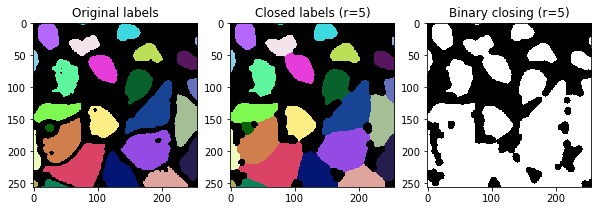

In [5]:
r = 5

fix, axs = plt.subplots(1,3, figsize=(10,10))

cle.imshow(labels, plot=axs[0], labels=True)
cle.imshow(cle.closing_labels(labels, radius=r), plot=axs[1], labels=True)
cle.imshow(cle.closing_sphere(labels != 0, radius_x=r, radius_y=r), plot=axs[2], color_map="Greys_r")

axs[0].set_title("Original labels")
axs[1].set_title("Closed labels (r=" + str(r) + ")")
axs[2].set_title("Binary closing (r=" + str(r) + ")")


## Comparison of label closing to morphological closing

Text(0.5, 1.0, 'Binary closing (r=24)')

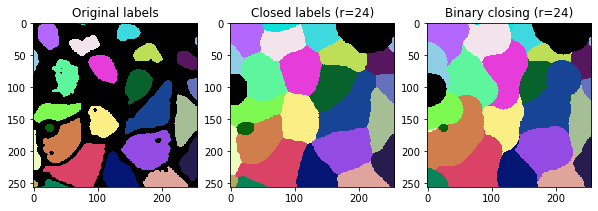

In [6]:
r = 24

fix, axs = plt.subplots(1,3, figsize=(10,10))
    
cle.imshow(labels, plot=axs[0], labels=True)
cle.imshow(cle.closing_labels(labels, radius=r), plot=axs[1], labels=True)
cle.imshow(cle.closing_sphere(labels, radius_x=r, radius_y=r), plot=axs[2], labels=True)

axs[0].set_title("Original labels")
axs[1].set_title("Closed labels (r=" + str(r) + ")")
axs[2].set_title("Binary closing (r=" + str(r) + ")")


## Comparison of label closing to naive dilate_labels + erode_labels

In [7]:
def naive_closing_labels(labels, radius):
    temp = cle.dilate_labels(labels, radius=radius)
    return cle.erode_labels(temp, radius=radius)

Text(0.5, 1.0, 'Dilation + erosion (r=12)')

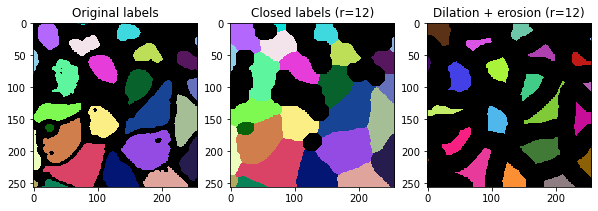

In [8]:
r = 12

fix, axs = plt.subplots(1,3, figsize=(10,10))
    
cle.imshow(labels, plot=axs[0], labels=True)
cle.imshow(cle.closing_labels(labels, radius=r), plot=axs[1], labels=True)
cle.imshow(naive_closing_labels(labels, radius=r), plot=axs[2], labels=True)

axs[0].set_title("Original labels")
axs[1].set_title("Closed labels (r=" + str(r) + ")")
axs[2].set_title("Dilation + erosion (r=" + str(r) + ")")


## Archive
The following code was used to produce the video shown in [this tweet](https://twitter.com/haesleinhuepf/status/1492215964305436673)

C:\Users\rober\AppData\Local\Temp\ipykernel_9796\2910083520.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fix, axs = plt.subplots(1,3, figsize=(10,10))


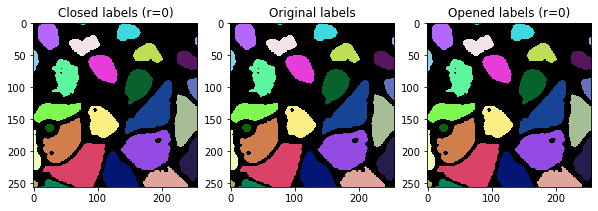

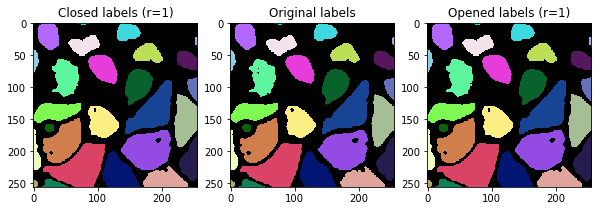

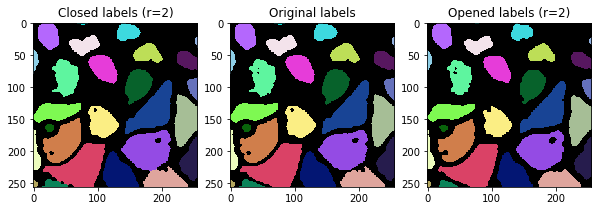

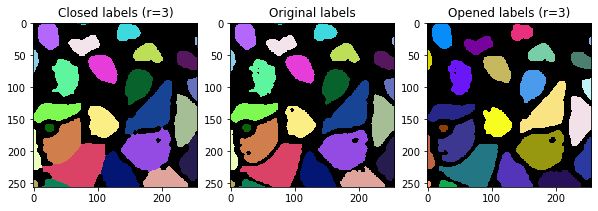

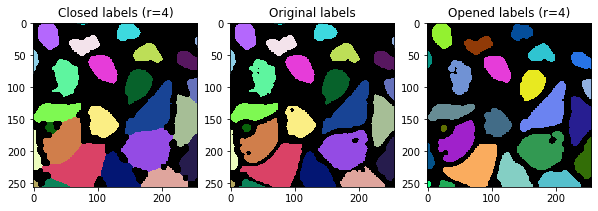

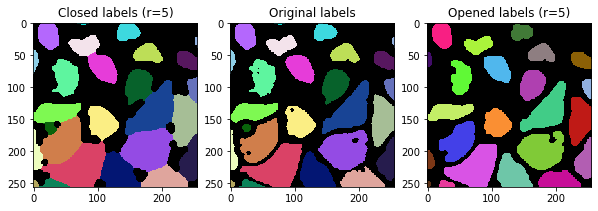

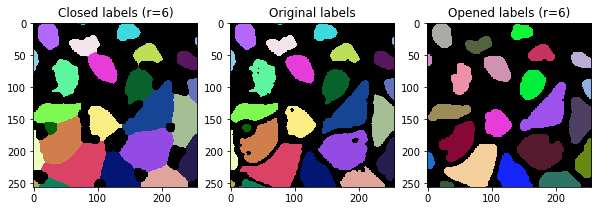

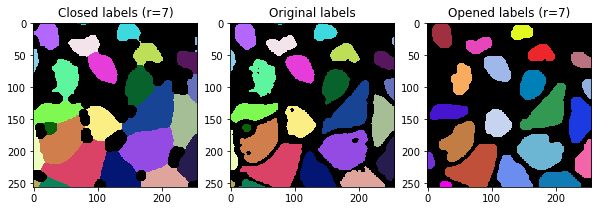

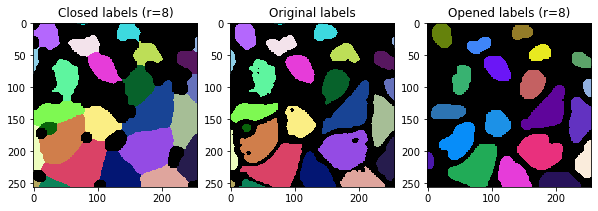

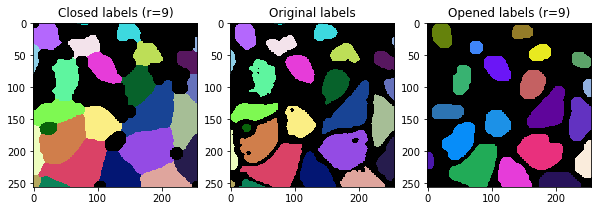

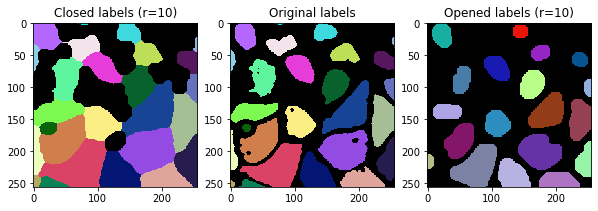

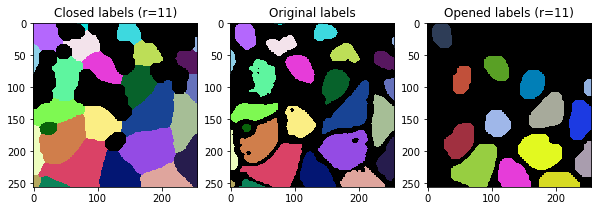

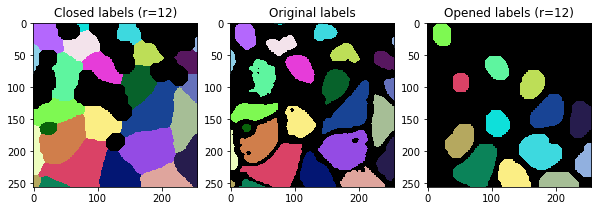

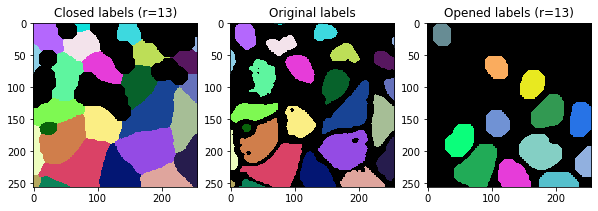

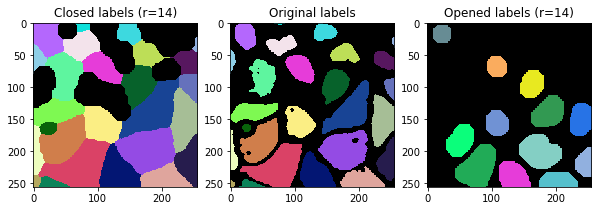

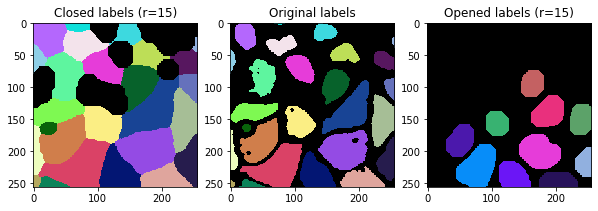

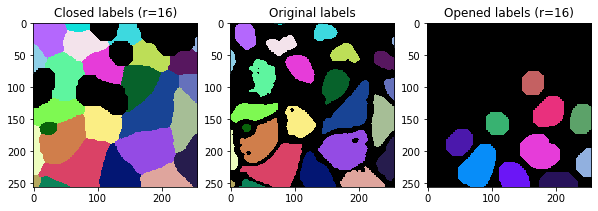

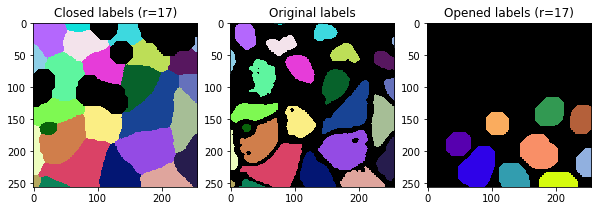

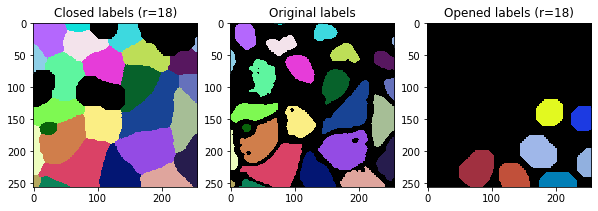

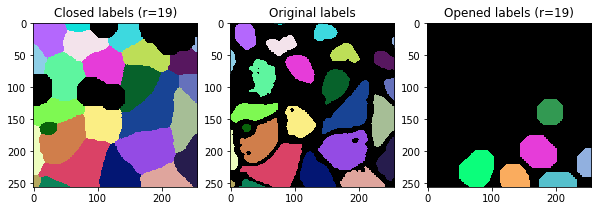

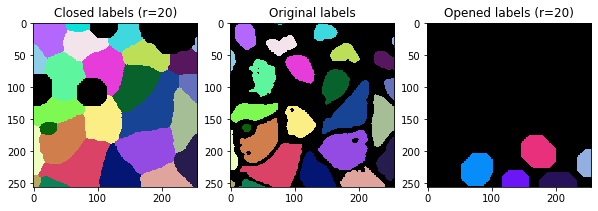

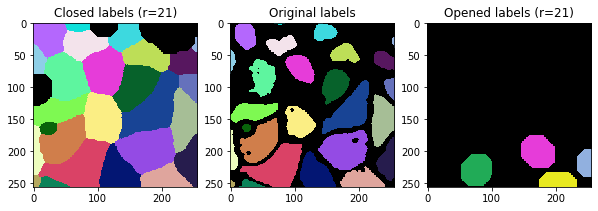

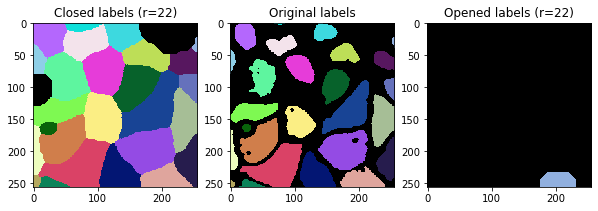

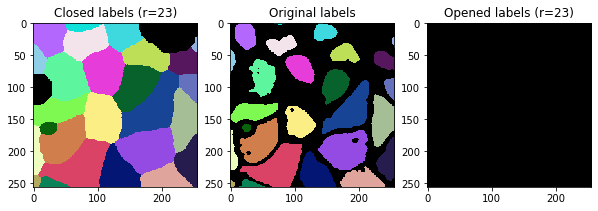

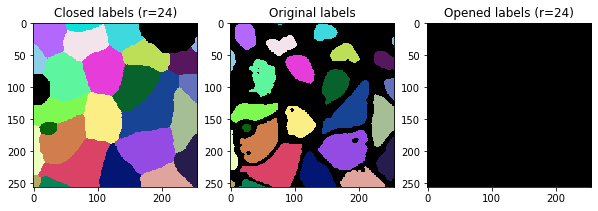

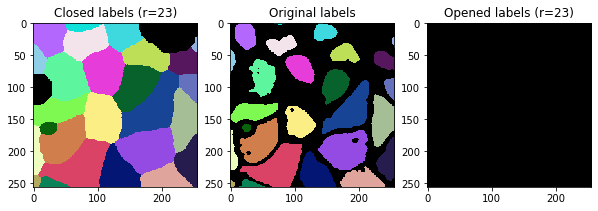

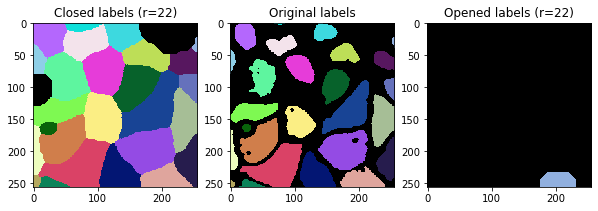

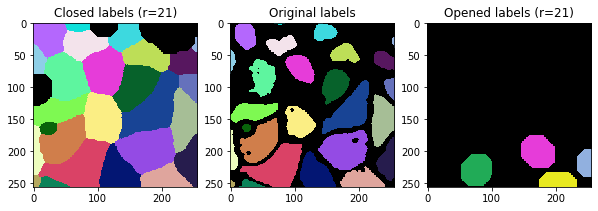

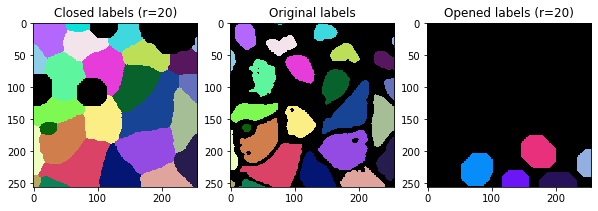

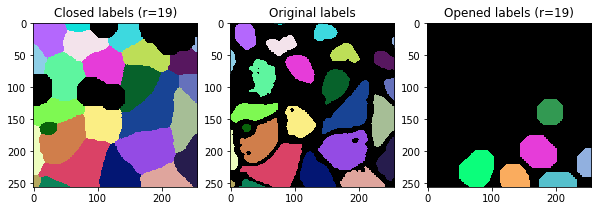

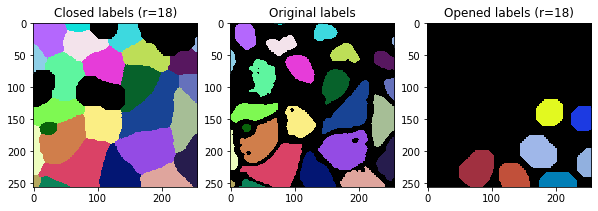

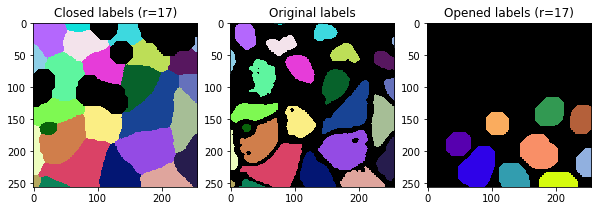

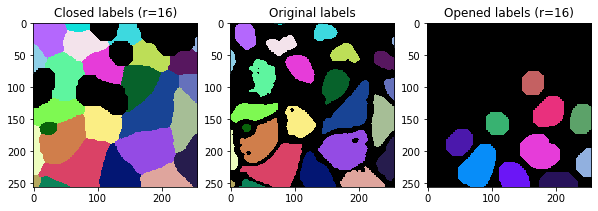

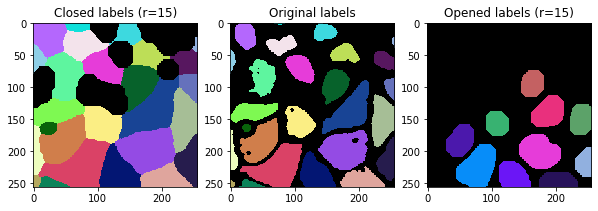

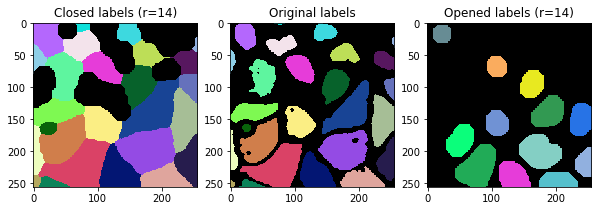

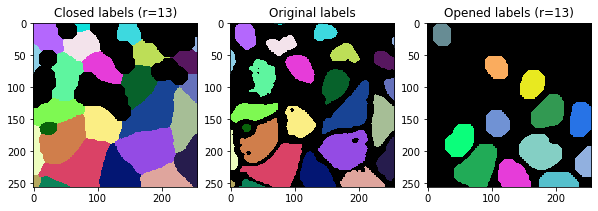

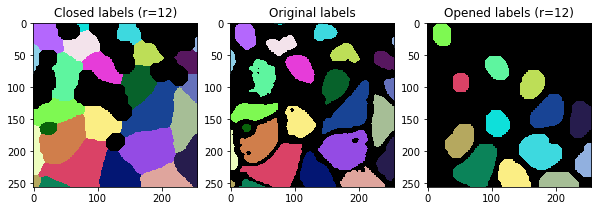

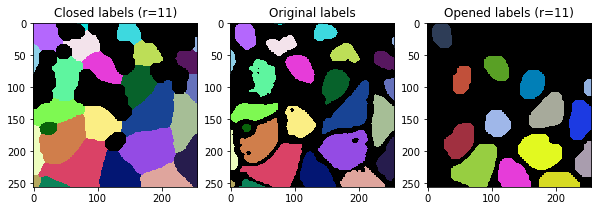

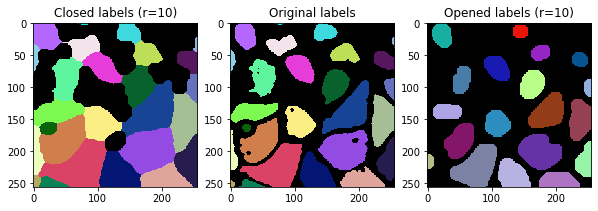

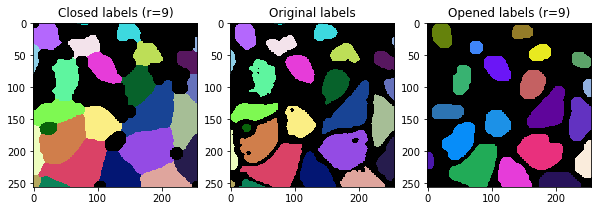

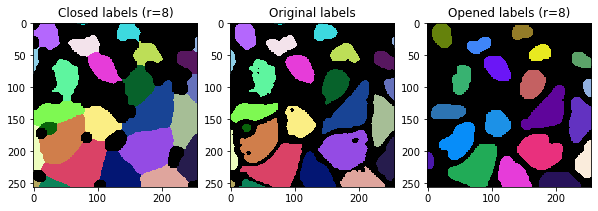

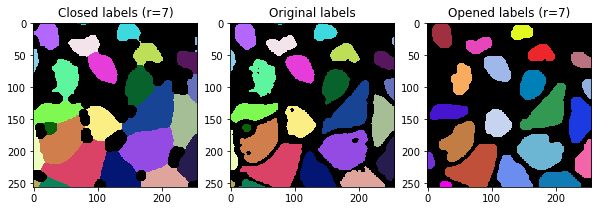

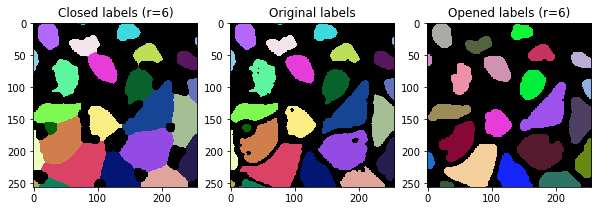

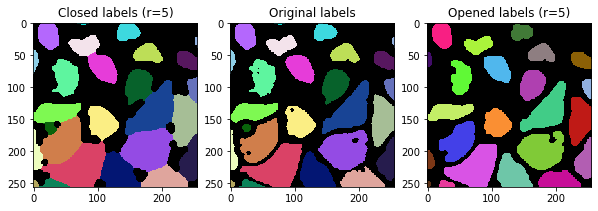

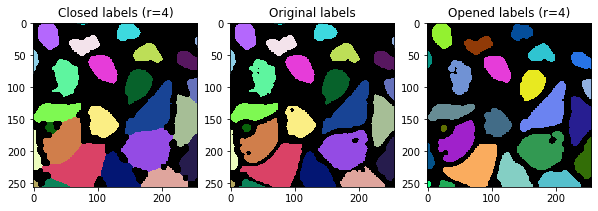

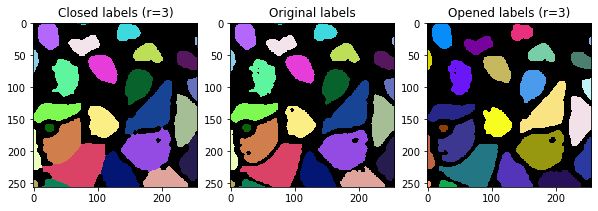

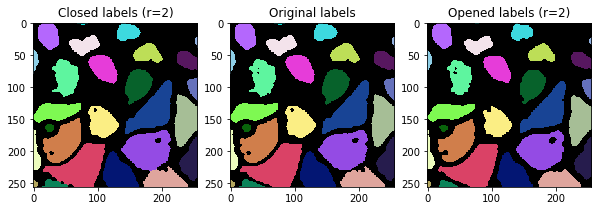

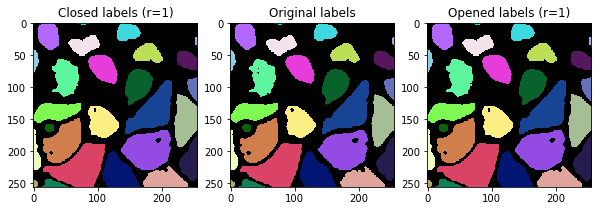

In [9]:
for i, r in enumerate(list(range(0, 24, 1)) + list(range(24, 0, -1))):
    
    fix, axs = plt.subplots(1,3, figsize=(10,10))
    
    cle.imshow(cle.closing_labels(labels, radius=r), plot=axs[0], labels=True)
    cle.imshow(labels, plot=axs[1], labels=True)
    cle.imshow(cle.opening_labels(labels, radius=r), plot=axs[2], labels=True)
    
    axs[0].set_title("Closed labels (r=" + str(r) + ")")
    axs[1].set_title("Original labels")
    axs[2].set_title("Opened labels (r=" + str(r) + ")")
    
    #plt.savefig("temp/%02d" % (i,) + ".png")